In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
# Read historical stock price data into a Pandas DataFrame
data = pd.read_csv('W:\IoT Remote Consultant\Website\Business\Trading\Strategies\DataFullTest.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


In [3]:
data=data[data['Volume']>20000]
len(data)

60

In [4]:
# Define short-term and long-term periods
short_period = 5
long_period = 10

# Calculate moving averages
data['SMA_short'] = data['Close'].rolling(window=short_period).mean()
data['SMA_long'] = data['Close'].rolling(window=long_period).mean()


In [5]:
#  "Peak" is defined as a price where the current closing price is greater than both the previous and next closing prices.
data['Peak'] = data['Close'][(data['Close'] > data['Close'].shift(1)) & (data['Close'] > data['Close'].shift(-1))]
# A "Trough" is defined as a price where the current closing price is less than both the previous and next closing prices.
data['Trough'] = data['Close'][(data['Close'] < data['Close'].shift(1)) & (data['Close'] < data['Close'].shift(-1))]


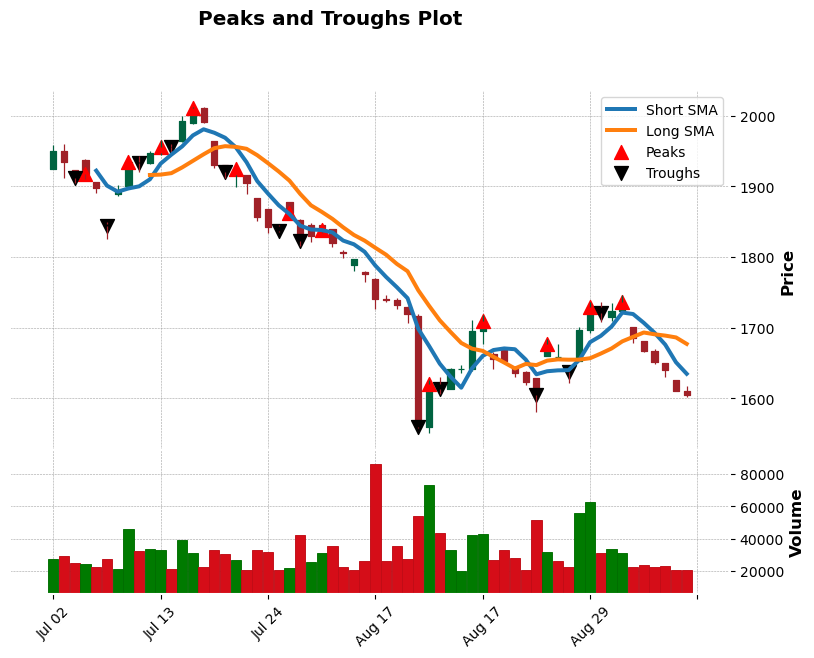

In [6]:
# Create a dictionary to specify legend labels for your features
legend_dict = {
    'SMA_short': 'Short SMA',
    'SMA_long': 'Long SMA',
    'Peak': 'Peaks',
    'Trough': 'Troughs',
}
sma_short=data['SMA_short']
sma_long=data['SMA_long']
# Create addplots with legend labels
feature_plots = [
    mpf.make_addplot(sma_short, label=legend_dict['SMA_short']),
    mpf.make_addplot(sma_long, label=legend_dict['SMA_long']),
    mpf.make_addplot(data['Peak'], type='scatter', color='r', markersize=100, marker='^', label=legend_dict['Peak']),
    mpf.make_addplot(data['Trough'], type='scatter', color='k', markersize=100, marker='v', label=legend_dict['Trough']),
]

# Create the plot with the legend
mpf.plot(data, type='candle', style='charles', title="Peaks and Troughs Plot",addplot=feature_plots, figscale=1.25, volume=True)
